In [1]:
library(ggplot2)
library(dplyr)
library(tibble)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
csvfile <- read.csv("/groups/dog/stage/victor/count_output.csv", header=FALSE)
#head(csvfile)

In [3]:
csvfile <- dplyr::mutate(csvfile, sample = strsplit(V1, split="-unmapped|-mapped")) %>%
dplyr::mutate(type = ifelse(endsWith(V1, "-mapped"), "mapped", "unmapped")) %>%
dplyr::rename(count = V2) %>%
dplyr::select(-V1)

csvfile$sample <- as.character(csvfile$sample)
csvfile$type <- as.factor(csvfile$type)

csvfile <- csvfile %>%
dplyr::mutate(group = ifelse(startsWith(sample, "501"), "Melanoma", ifelse(startsWith(sample, "ADC"), "Lung", ifelse(startsWith(sample, "U251"), "Glioblastoma", "Prostate")))) %>%
dplyr::group_by(sample) %>%
dplyr::mutate(total = sum(count))


#csvfile

In [4]:
# Reorder dataframe by group and then by total number of read
csvfile <- csvfile[order(csvfile[,4], csvfile[,5]),]

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


In [5]:
# Putting id column to order manually order our sample on the plot
csvfile$id <- c(1:nrow(csvfile))

In [6]:
# Stacked plot
plot1 <- ggplot(csvfile, aes(fill=group, alpha=type, y=count, x=reorder(sample, id), group=group, label=formatC(c(count/total), digits=2, format="f"))) + 
    geom_bar(width=0.95, position="stack", stat="identity") +
    scale_alpha_manual(values=c(1, 0.5)) +
    coord_flip() + 
    labs(fill="Cancer", alpha="Read type") +
    xlab("Sample") +
    ylab("Number of reads") +
    geom_text(size = 4, position = position_stack(vjust = 0.5)) + 
    scale_y_continuous(labels = scales::unit_format(unit = "M", scale = 1e-6), breaks = scales::pretty_breaks(n=6)) +
    ggtitle("Number of mapped and unmapped reads across samples") +
    theme_bw() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 25),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 17),
        legend.title = element_text(size = 15),
        legend.text = element_text(size = 15)
    )

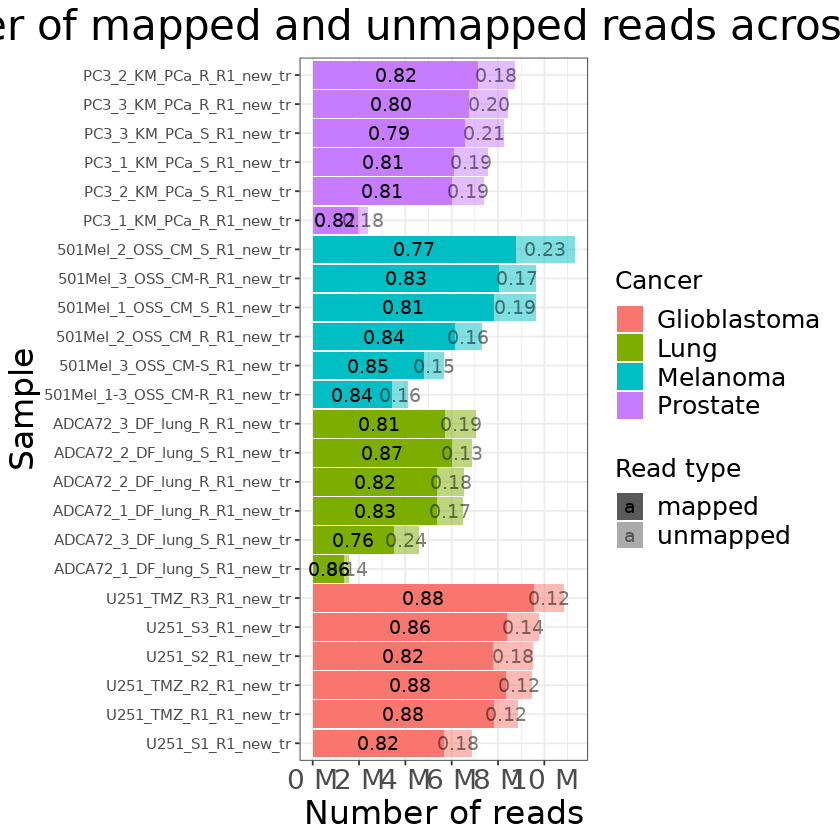

In [7]:
print(plot1)

In [8]:
pdf(paste0("mapped_unmapped_proportions.pdf"), width=10, height=8)
print(plot1)
dev.off()

png 
  2